In [1]:
# Import important libraries
import numpy as np
import pandas as pd

# Import important libraries visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to ignore warnings
import warnings
warnings.filterwarnings

pd.set_option('display.max_columns',None)

# Import libraries for handling categorical data
from sklearn.preprocessing import LabelEncoder

from scipy import stats
from scipy.stats import uniform

# Import libraries to handle scaling
from sklearn.preprocessing import MinMaxScaler

# Libraries to split data into Train and Test Data
from sklearn.model_selection import train_test_split

# Libraries to evaluate model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import models algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import RandomizedSearchCV


C:\Users\PRATIK KALE\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import mysql.connector

In [3]:
connection = mysql.connector.connect(host='18.136.157.135',
                                    user='dm_team3',
                                    password='DM!$!Team!27@9!20&',
                                    database='project_telecom',
                                    auth_plugin='mysql_native_password')

In [4]:
database = "select * from  telecom_churn_data"
df = pd.read_sql(database,connection)
df

C:\Users\PRATIK KALE\AppData\Local\Temp\ipykernel_26320\1031477393.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(database,connection)


,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [5]:
df = df.rename(columns={'columns1': 'State','columns2': 'Account_Length','columns3':'Area_Code','columns4':'Phone','columns5':'International_Plan','columns6':'VMail_Plan','columns7':'VMail_Message','columns8':'Day_Mins','columns9':'Day_Calls','columns10':'Day_Charge','columns11':'Eve_Mins','columns12':'Eve_Calls','columns13':'Eve_Charge','columns14':'Night_Mins','columns15':'Night_Calls','columns16':'Night_Charge','columns17':'International_Mins','columns18':'International_calls','columns19':'International_Charge','columns20':'CustServ_Calls','columns21':'Churn'})

In [6]:
df.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'International_Plan',
       'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_calls',
       'International_Charge', 'CustServ_Calls', 'Churn'],
      dtype='object')

In [7]:
#creating a list except the elements which are catergorical[state,Int_plan,Phone,Vmail_plan,Churn]
list = ['Account_Length', 'Area_Code', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_calls',
       'International_Charge', 'CustServ_Calls']

#ff['Acc_len']= pd.to_numeric(ff.Acc_len,errors='coerce')

df[list]= df[list].apply(pd.to_numeric,errors='coerce')

# Basic checks

In [8]:
df.shape

(4617, 21)

In [9]:
df.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [10]:
df.tail()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.
4616,IN,140,415,409-6884,no,no,0,204.7,100,34.80,126.8,107,10.78,202.8,115,9.13,12.1,4,3.27,2,False.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int64  
 2   Area_Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International_Plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   VMail_Message         4617 non-null   int64  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   int64  
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   int64  
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_Calls           4617 non-null   int64  
 15  Night_Charge         

In [12]:
df.describe()

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [13]:
df.describe(include='O')

,State,Phone,International_Plan,VMail_Plan,Churn
count,4617,4617,4617,4617,4617
unique,51,4617,2,2,2
top,WV,382-4657,no,no,False.
freq,149,1,4171,3381,3961


In [14]:
df.isna().sum()

State                   0
Account_Length          0
Area_Code               0
Phone                   0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_Mins      0
International_calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.drop('Phone',axis=1,inplace=True)
df.drop('VMail_Message',axis=1,inplace=True)

In [17]:
df_num =df.select_dtypes(include=['float64','int64'])
df_num.shape

(4617, 15)

In [18]:
df_cat =df.select_dtypes(exclude=['float64','int64'])
df_cat.shape

(4617, 4)

In [19]:
corr_abs =df_num.corr().abs()
sol =(corr_abs.where(np.triu(np.ones(corr_abs.shape),k=1).astype(np.bool_))
      .stack()
      .sort_values(ascending=False))
sol

Day_Mins            Day_Charge              1.000000
Eve_Mins            Eve_Charge              1.000000
Night_Mins          Night_Charge            0.999999
International_Mins  International_Charge    0.999993
Account_Length      Day_Calls               0.032783
                                              ...   
Eve_Charge          International_Charge    0.000170
Day_Mins            International_calls     0.000166
Eve_Mins            International_Mins      0.000165
Day_Charge          International_calls     0.000163
Eve_Charge          International_Mins      0.000163
Length: 105, dtype: float64

In [20]:
df_num.drop(['Day_Mins','Eve_Mins','Night_Mins','International_Mins'],axis=1,inplace=True)

In [21]:
df_num

,Account_Length,Area_Code,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,International_calls,International_Charge,CustServ_Calls
0,128,415,110,45.07,99,16.78,91,11.01,3,2.70,1
1,107,415,123,27.47,103,16.62,103,11.45,3,3.70,1
2,137,415,114,41.38,110,10.30,104,7.32,5,3.29,0
3,84,408,71,50.90,88,5.26,89,8.86,7,1.78,2
4,75,415,113,28.34,122,12.61,121,8.41,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...
4612,57,510,81,24.48,112,15.91,122,7.14,6,2.30,3
4613,177,408,91,32.13,96,25.76,116,7.36,1,4.24,3
4614,67,408,126,21.68,129,25.17,91,9.04,3,3.51,1
4615,98,415,98,28.71,117,19.24,96,7.45,3,3.86,0


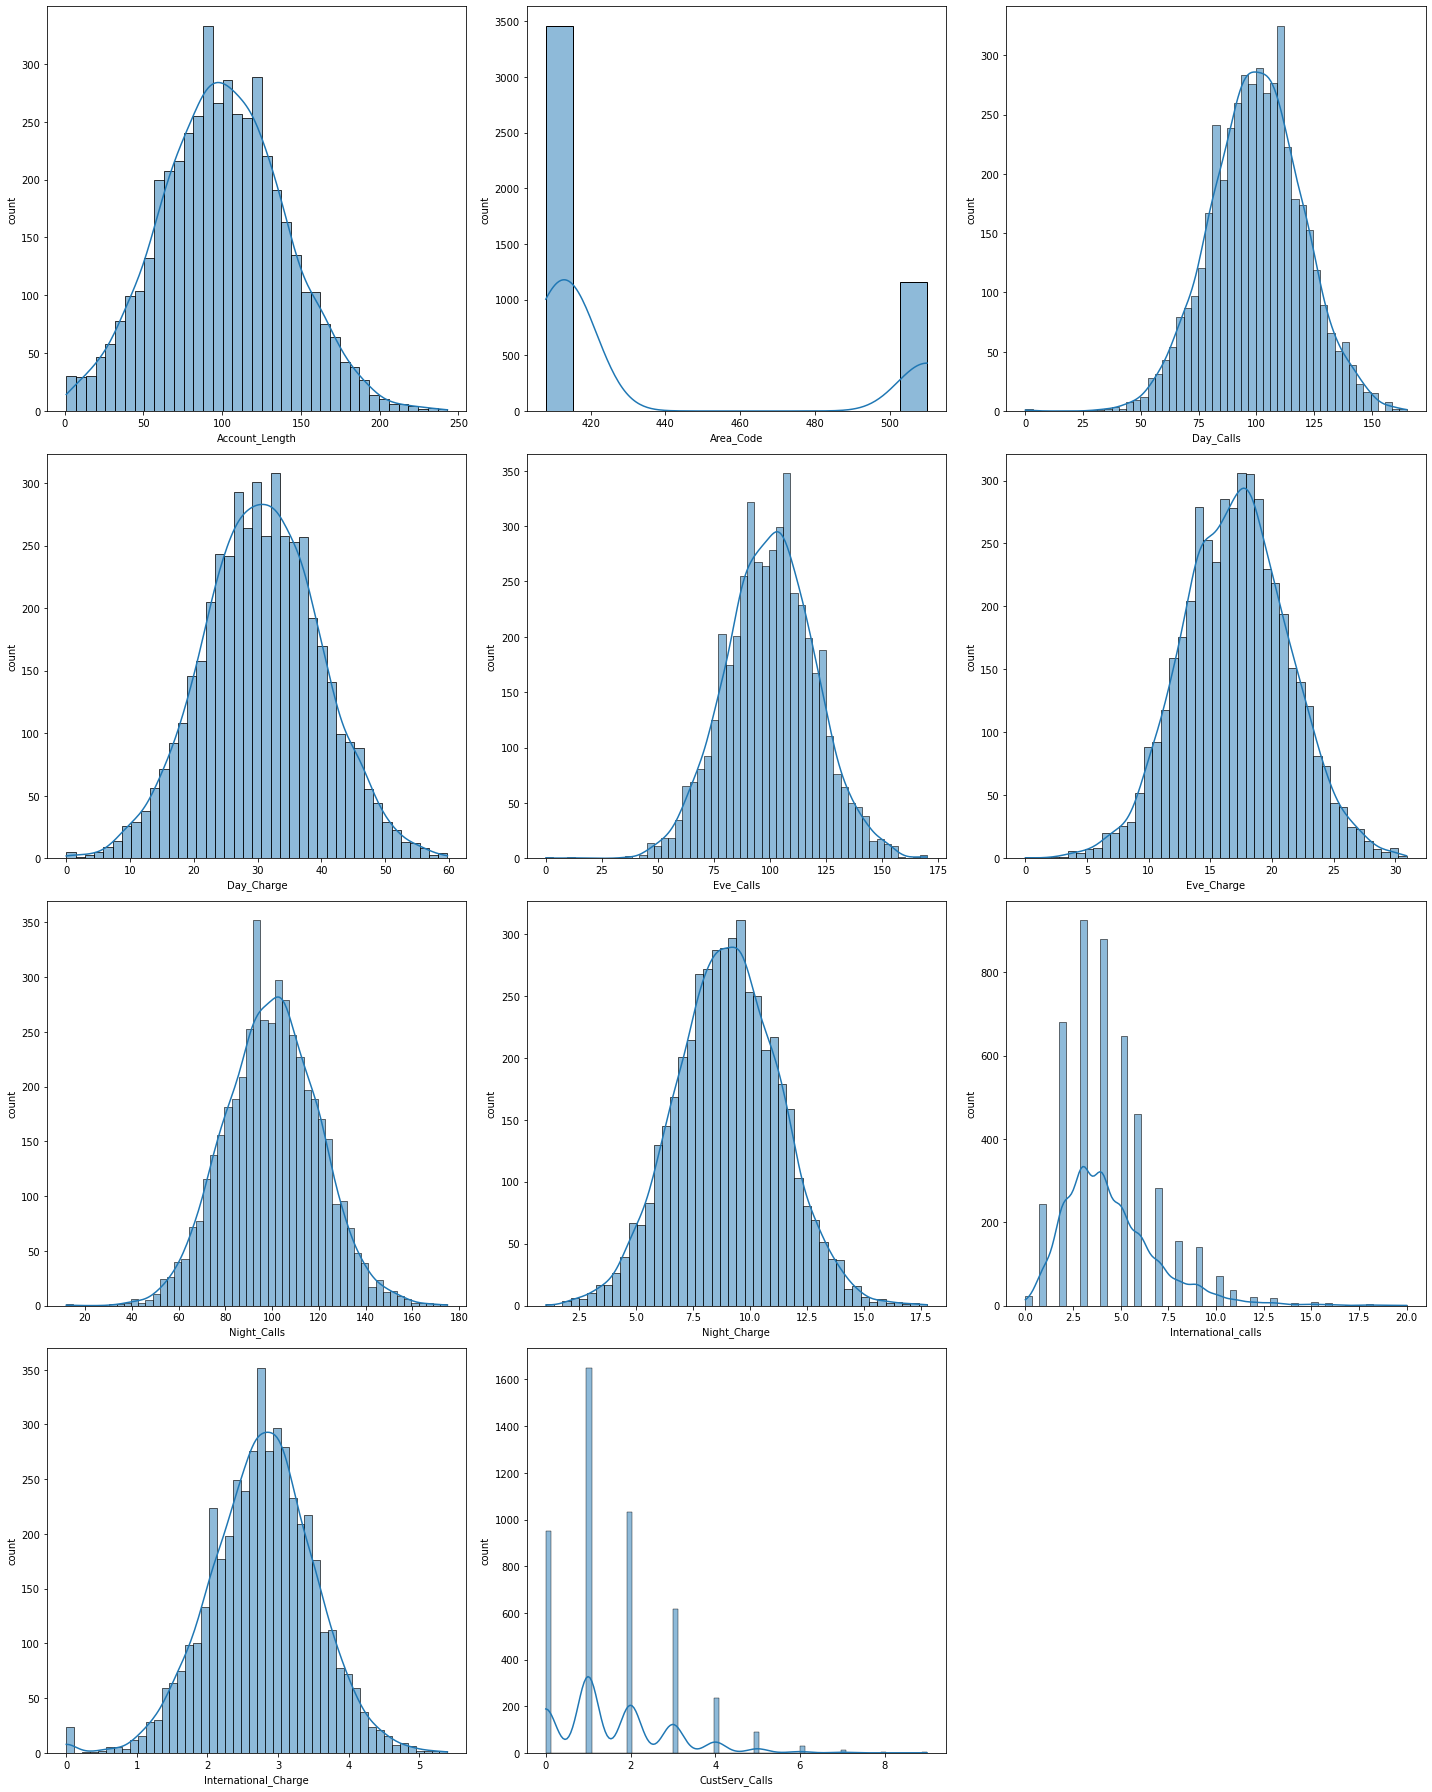

In [22]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in df_num.columns:  # Use data.columns to iterate over column names
    if plotnumber <= 12:
        ax = plt.subplot(4,3, plotnumber)
        sns.histplot(x=df_num[column],kde=True)  # Use x=data[column] to specify the column for boxplot
        plt.xlabel(column)
        plt.ylabel('count')
    plotnumber += 1

plt.tight_layout()
plt.show()

In [23]:
df.Churn.value_counts()

Churn
False.    3961
True.      656
Name: count, dtype: int64

In [24]:
df_cat.columns

Index(['State', 'International_Plan', 'VMail_Plan', 'Churn'], dtype='object')

In [25]:
df_cat.International_Plan =df_cat.International_Plan.map({' no':0,' yes':1})
df_cat.VMail_Plan =df_cat.VMail_Plan.map({' yes':0,' no':1})
df_cat.Churn =df_cat.Churn.map({' False.':0,' True.':1})


In [26]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [27]:
df_cat.State =lc.fit_transform(df_cat.State)

In [28]:
df_cat.head()

,State,International_Plan,VMail_Plan,Churn
0,16,0,0,0
1,35,0,0,0
2,31,0,1,0
3,35,1,1,0
4,36,1,1,0


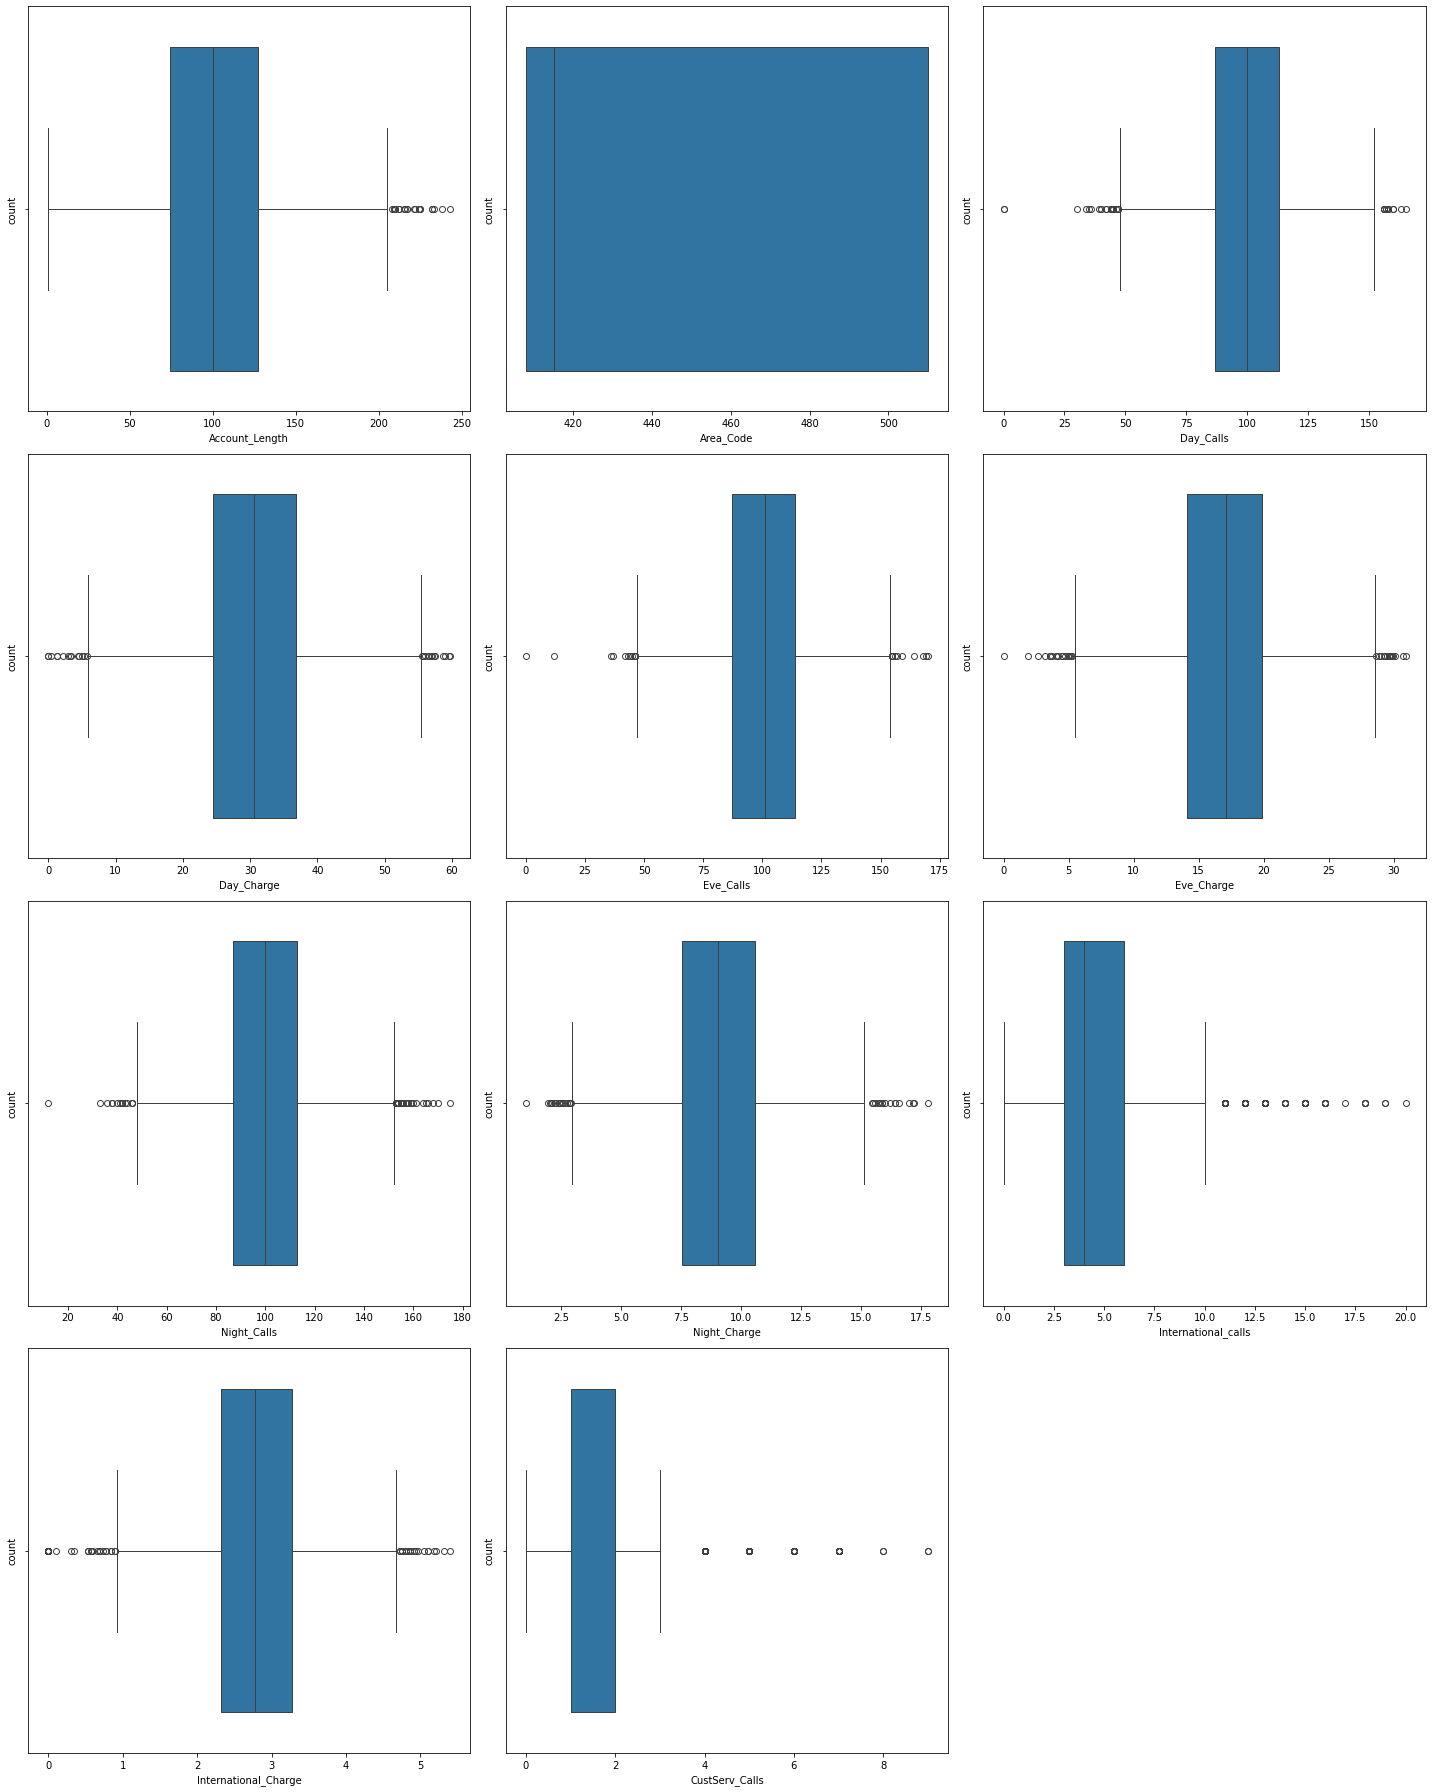

In [29]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in df_num.columns:  # Use data.columns to iterate over column names
    if plotnumber <= 12:
        ax = plt.subplot(4,3, plotnumber)
        sns.boxplot(x=df_num[column])  # Use x=data[column] to specify the column for boxplot
        plt.xlabel(column)
        plt.ylabel('count')
    plotnumber += 1

plt.tight_layout()
plt.show()

In [30]:
from scipy import stats  # Make sure to import the necessary libraries

col = 1
for c in df_num:  # Assuming df1 is your DataFrame
    if col <=12:
        IQR = stats.iqr(df_num[c], interpolation='midpoint')
        print(c, 'IQR:', IQR)
        Q1 = df_num[c].quantile(0.25)
        Q3 = df_num[c].quantile(0.75)
        min_limit = Q1 - 1.5 * IQR
        print(c, 'min_limit:', min_limit)
        max_limit = Q3 + 1.5 * IQR
        print(c, 'max_limit:', max_limit, '\n')

        # Replace outliers with the median
        df_num.loc[(df_num[c] < min_limit) | (df_num[c] > max_limit), c] = np.median(df_num[c])

        # Double-check if outliers are replaced
        replaced_outliers = df_num.loc[(df_num[c] < min_limit) | (df_num[c] > max_limit), c]
        print(f"Replaced outliers in {c}:", replaced_outliers, '\n')
    
    col += 1

Account_Length IQR: 53.0
Account_Length min_limit: -5.5
Account_Length max_limit: 206.5 

Replaced outliers in Account_Length: Series([], Name: Account_Length, dtype: int64) 

Area_Code IQR: 102.0
Area_Code min_limit: 255.0
Area_Code max_limit: 663.0 

Replaced outliers in Area_Code: Series([], Name: Area_Code, dtype: int64) 

Day_Calls IQR: 26.0
Day_Calls min_limit: 48.0
Day_Calls max_limit: 152.0 

Replaced outliers in Day_Calls: Series([], Name: Day_Calls, dtype: int64) 

Day_Charge IQR: 12.43
Day_Charge min_limit: 5.785
Day_Charge max_limit: 55.504999999999995 

Replaced outliers in Day_Charge: Series([], Name: Day_Charge, dtype: float64) 

Eve_Calls IQR: 27.0
Eve_Calls min_limit: 46.5
Eve_Calls max_limit: 154.5 

Replaced outliers in Eve_Calls: Series([], Name: Eve_Calls, dtype: int64) 

Eve_Charge IQR: 5.790000000000001
Eve_Charge min_limit: 5.414999999999997
Eve_Charge max_limit: 28.575000000000003 

Replaced outliers in Eve_Charge: Series([], Name: Eve_Charge, dtype: float64) 


C:\Users\PRATIK KALE\AppData\Local\Temp\ipykernel_26320\3513079753.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  IQR = stats.iqr(df_num[c], interpolation='midpoint')
C:\Users\PRATIK KALE\AppData\Local\Temp\ipykernel_26320\3513079753.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  IQR = stats.iqr(df_num[c], interpolation='midpoint')
C:\Users\PRATIK KALE\AppData\Local\Temp\ipykernel_26320\3513079753.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'hig

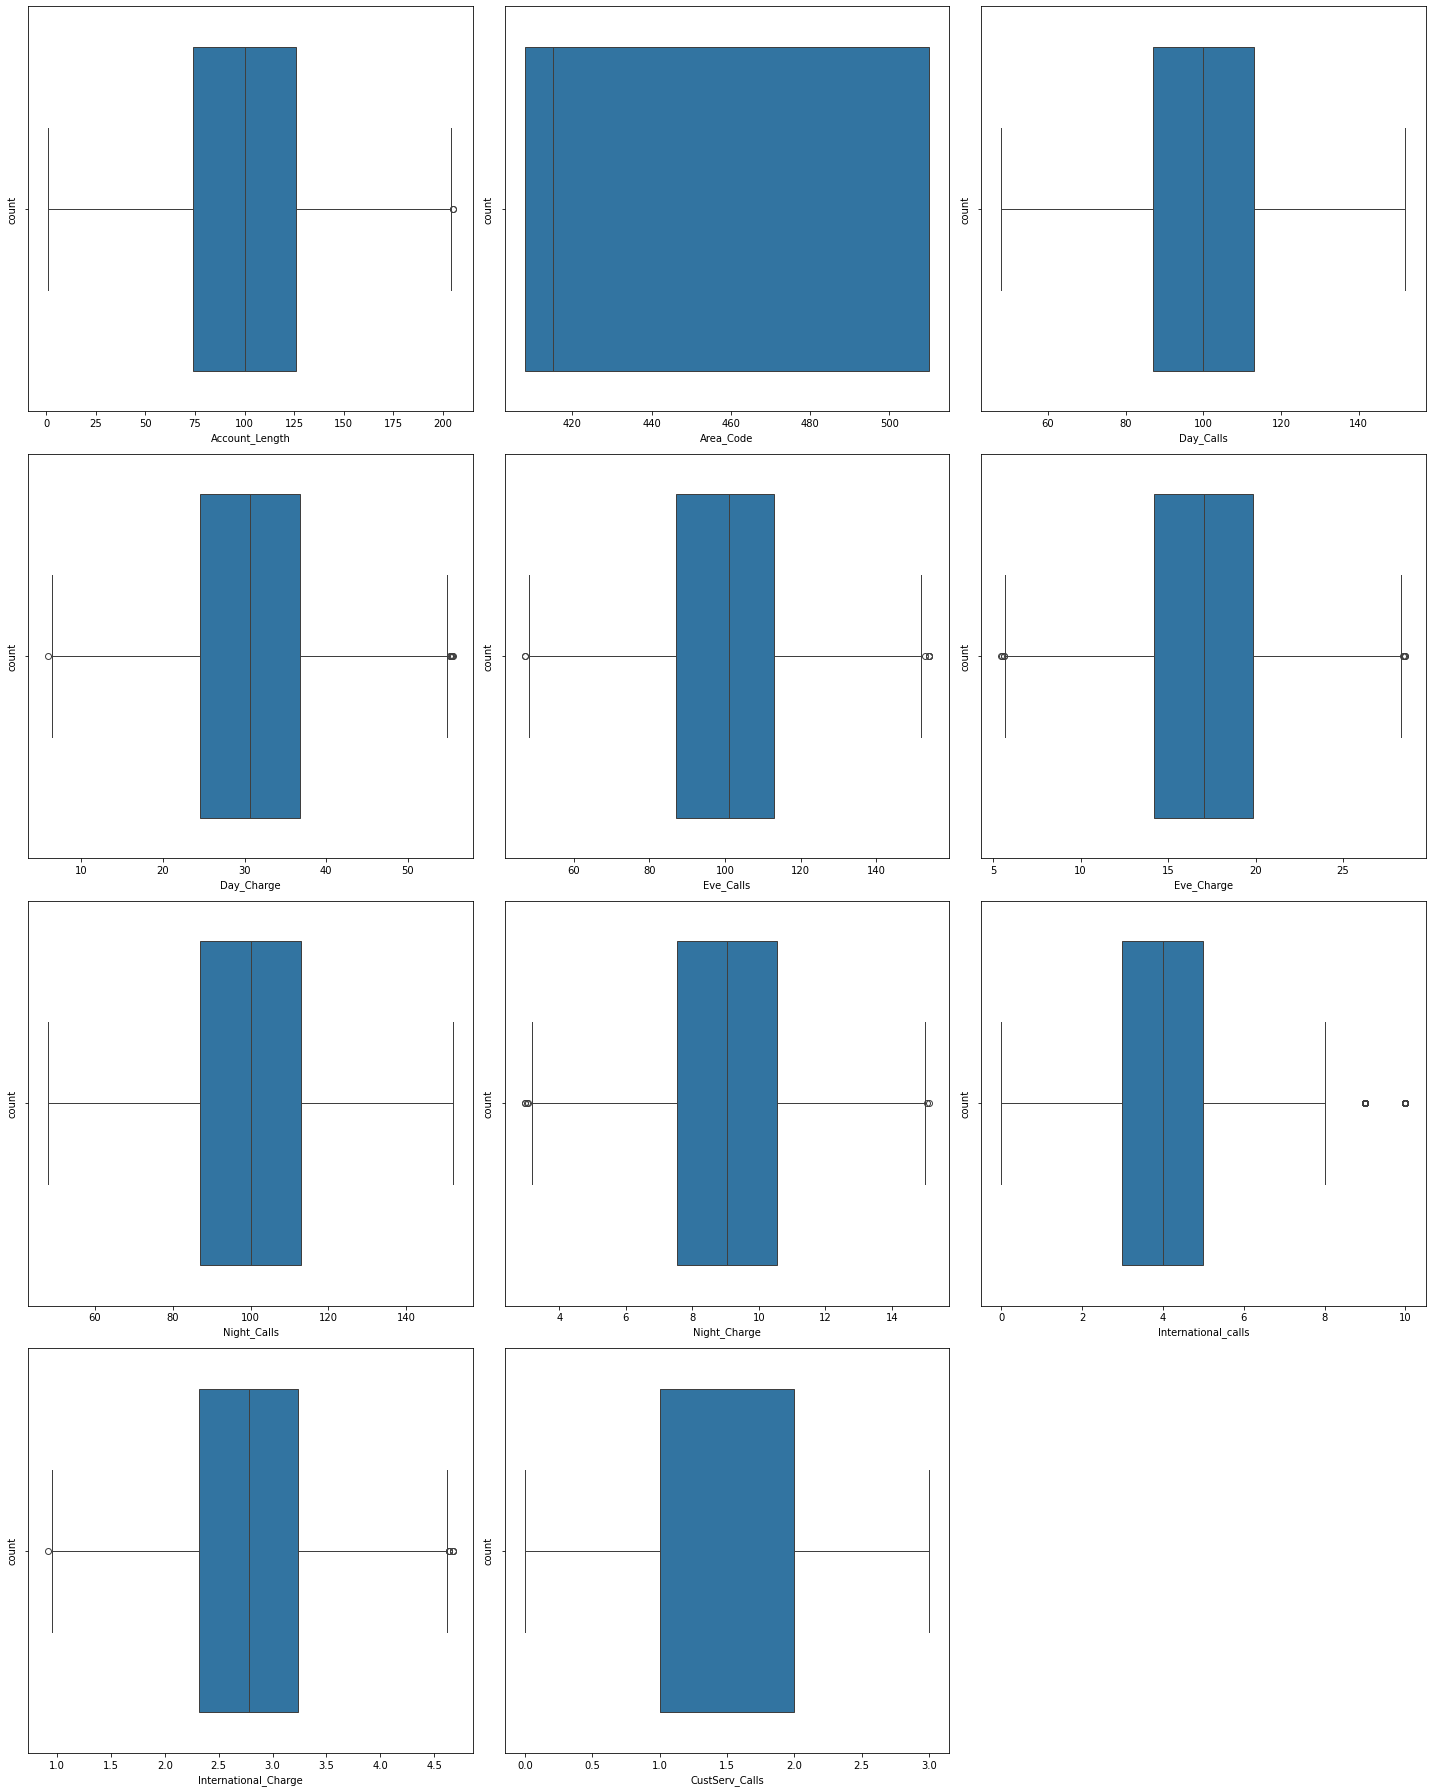

In [31]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in df_num.columns:  # Use data.columns to iterate over column names
    if plotnumber <= 12:
        ax = plt.subplot(4,3, plotnumber)
        sns.boxplot(x=df_num[column])  # Use x=data[column] to specify the column for boxplot
        plt.xlabel(column)
        plt.ylabel('count')
    plotnumber += 1

plt.tight_layout()
plt.show()

In [32]:
df1=pd.concat([df_num,df_cat],axis=1)

In [33]:
df1.head(20)

,Account_Length,Area_Code,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,International_calls,International_Charge,CustServ_Calls,State,International_Plan,VMail_Plan,Churn
0,128,415,110,45.07,99,16.78,91,11.01,3,2.70,1,16,0,0,0
1,107,415,123,27.47,103,16.62,103,11.45,3,3.70,1,35,0,0,0
2,137,415,114,41.38,110,10.30,104,7.32,5,3.29,0,31,0,1,0
3,84,408,71,50.90,88,17.07,89,8.86,7,1.78,2,35,1,1,0
4,75,415,113,28.34,122,12.61,121,8.41,3,2.73,3,36,1,1,0
5,118,510,98,37.98,101,18.75,118,9.18,6,1.70,0,1,1,1,0
6,121,510,88,37.09,108,17.07,118,9.57,7,2.03,3,19,0,0,0
7,147,415,79,26.69,94,8.76,96,9.53,6,1.92,0,24,1,1,0
8,117,408,97,31.37,80,17.07,90,9.71,4,2.35,1,18,0,1,0
9,141,415,84,43.96,111,18.87,97,14.69,5,3.02,0,49,1,0,0


In [34]:
x =df1.drop(["Churn"],axis=1)
y =df1[['Churn']]

In [35]:
x.shape

(4617, 14)

In [36]:
x.columns

Index(['Account_Length', 'Area_Code', 'Day_Calls', 'Day_Charge', 'Eve_Calls',
       'Eve_Charge', 'Night_Calls', 'Night_Charge', 'International_calls',
       'International_Charge', 'CustServ_Calls', 'State', 'International_Plan',
       'VMail_Plan'],
      dtype='object')

In [37]:
y.shape

(4617, 1)

In [38]:
## Apply scaling to all columns
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x =sc.fit_transform(x)

In [39]:
x

array([[ 0.72280374, -0.52139206,  0.51159335, ..., -0.67900123,
        -0.32699969, -1.65391562],
       [ 0.17979365, -0.52139206,  1.19005165, ...,  0.60575838,
        -0.32699969, -1.65391562],
       [ 0.95552234, -0.52139206,  0.72034975, ...,  0.33528267,
        -0.32699969,  0.60462577],
       ...,
       [-0.85451128, -0.68694075,  1.34661895, ...,  1.34956657,
        -0.32699969, -1.65391562],
       [-0.05292496, -0.52139206, -0.11467585, ..., -0.27328767,
        -0.32699969, -1.65391562],
       [ 1.03309521, -0.52139206, -0.01029765, ..., -0.74662015,
        -0.32699969,  0.60462577]])

In [41]:
x =pd.DataFrame(x,columns=['Account_Length', 'Area_Code', 'Day_Calls',
       'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls', 'Night_Charge',
       'International_calls', 'International_Charge', 'CustServ_Calls',
       'State', 'International_Plan', 'VMail_Plan'])

In [42]:
x.head()

,Account_Length,Area_Code,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,International_calls,International_Charge,CustServ_Calls,State,International_Plan,VMail_Plan
0,0.722804,-0.521392,0.511593,1.610020,-0.062503,-0.065158,-0.461999,0.904454,-0.596661,-0.127784,-0.302543,-0.679001,-0.327000,-1.653916
1,0.179794,-0.521392,1.190052,-0.359870,0.144919,-0.103784,0.166385,1.105346,-0.596661,1.326473,-0.302543,0.605758,-0.327000,-1.653916
2,0.955522,-0.521392,0.720350,1.197014,0.507908,-1.629530,0.218750,-0.780301,0.375215,0.730228,-1.367210,0.335283,-0.327000,0.604626
3,-0.414932,-0.686941,-1.523782,2.262546,-0.632913,0.004853,-0.566730,-0.077178,1.347092,-1.465700,0.762123,0.605758,3.058107,0.604626
4,-0.647650,-0.521392,0.668161,-0.262495,1.130174,-1.071860,1.108961,-0.282636,-0.596661,-0.084156,1.826789,0.673377,3.058107,0.604626


In [43]:
# Training and testing data creation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3693, 14)
(924, 14)
(3693, 1)
(924, 1)


In [45]:
df1.Churn.value_counts()

Churn
0    3961
1     656
Name: count, dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [47]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_train,y_train)
print("Actual Classes", Counter(y_train))
print("SMOTE Classes", Counter(y_smote))

Actual Classes Counter({'Churn': 1})
SMOTE Classes Counter({'Churn': 1})


In [48]:
y_smote.value_counts()

Churn
0        3162
1        3162
Name: count, dtype: int64

In [49]:
# Training and testing data creation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

In [50]:
clf=LogisticRegression()
clf.fit(x_smote,y_smote)

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,classification_report,f1_score

In [52]:
# Make predictions on the test data
y_pred_log = clf.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.71
Confusion Matrix:
[[466 171]
 [200 428]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       637
           1       0.71      0.68      0.70       628

    accuracy                           0.71      1265
   macro avg       0.71      0.71      0.71      1265
weighted avg       0.71      0.71      0.71      1265



In [ ]:
GB =GradientBoostingClassifier()
GB.fit(x_smote,y_smote)

In [ ]:
# Make predictions on the test data
y_pred_log = GB.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

In [ ]:
# Make predictions on the train data
y_train_pred = GB.predict(x_smote)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_smote, y_train_pred)
conf_matrix = confusion_matrix(y_smote, y_train_pred)
class_report = classification_report(y_smote, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

In [ ]:
AB =AdaBoostClassifier()
AB.fit(x_smote,y_smote)


In [ ]:
# Make predictions on the test data
y_pred_log = AB.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

In [ ]:
# Make predictions on the train data
y_train_pred = AB.predict(x_smote)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_smote, y_train_pred)
conf_matrix = confusion_matrix(y_smote, y_train_pred)
class_report = classification_report(y_smote, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
import numpy as np

# Assuming 'new_data' is your 1D array
new_data = x.iloc[9:10,:]

# Now you can use this 2D array for prediction
output = clf.predict(new_data)

In [ ]:
print(output)